In [ ]:
#!apt install gdal-bin python-gdal python3-gdal #geopython libraries
#!apt install python3-rtree #install python3-rtree - Geopandas requirement
#!pip install git+git://github.com/geopandas/geopandas.git #install geopandas
#!pip install descartes #install descartes - Geopandas requirement
!pip install geopandas==0.8.2 #0.3.0
!pip install --upgrade pyshp
!pip install shapely==1.7.0
!pip install --upgrade descartes 
!pip install mapclassify==2.3.0 libpysal==4.3.0 splot==1.1.3
!pip install esda
!pip install pysal


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 962 kB 6.7 MB/s 
     |████████████████████████████████| 6.3 MB 27.6 MB/s 
     |████████████████████████████████| 16.7 MB 41.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 6.9 MB/s 
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.4
    Uninstalling Shapely-1.8.4:
      Successfully uninstalled Shapely-1.8.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 11.6 MB/s 
    

In [ ]:

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as sm 
#para graficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#para analise de dados espaciales
import geopandas as gpd
import pysal as ps
import splot
import mapclassify as mc

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


OBTER DADOS GEOPANDAS



In [ ]:
provincias = gpd.read_file('/content/drive/MyDrive/DADOS_GeograficosCovid/INSUMOS/Provincias.shp')

In [ ]:
type(provincias)

geopandas.geodataframe.GeoDataFrame

In [ ]:
provincias

,COUNT,FIRST_IDPR,NOMBPROV,FIRST_NOMB,LAST_DCTO,LAST_LEY,FIRST_FECH,LAST_FECHA,MIN_SHAPE_,ha,geometry
0,9.0,0301,ABANCAY,APURIMAC,LEY,S/N,28/12/1961,21/11/1893,3.458273e+05,345827.34,"POLYGON ((727616.067 8518998.361, 727746.468 8..."
1,8.0,0902,ACOBAMBA,HUANCAVELICA,LEY,5292,23/11/1925,23/11/1925,9.263674e+04,92636.74,"POLYGON ((561553.898 8584655.093, 561636.073 8..."
2,7.0,0802,ACOMAYO,CUSCO,LEY,S/N,11/11/1964,02/01/1857,9.328581e+04,93285.81,"POLYGON ((851750.493 8481942.044, 851804.240 8..."
3,5.0,0202,AIJA,ANCASH,LEY,8188,21/12/1907,05/03/1936,6.963963e+04,69639.63,"POLYGON ((202801.019 8911389.020, 202752.992 8..."
4,6.0,1602,ALTO AMAZONAS,LORETO,LEY,S/N,08/09/1964,02/01/1857,1.917213e+06,1917212.66,"POLYGON ((356772.084 9591899.498, 357416.455 9..."
...,...,...,...,...,...,...,...,...,...,...,...
192,33.0,1510,YAUYOS,LIMA,LEY,12644,26/03/1965,02/02/1956,6.990514e+05,699051.38,"POLYGON ((417090.897 8560722.968, 417081.099 8..."
193,8.0,0220,YUNGAY,ANCASH,L.R.,176,02/01/1857,02/08/1920,1.364843e+05,136484.28,"POLYGON ((177879.094 8960141.017, 177892.544 8..."
194,7.0,2113,YUNGUYO,PUNO,LEY,24042,28/12/1984,28/12/1984,4.206501e+04,42065.01,"MULTIPOLYGON (((1150392.381 8176632.065, 11504..."
195,4.0,2403,ZARUMILLA,TUMBES,LEY,S/N,25/11/1942,12/01/1871,7.581930e+04,75819.30,"POLYGON ((-79468.026 9605009.623, -79469.084 9..."


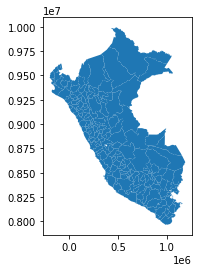

In [ ]:
provincias.plot()

In [ ]:
provincias['FIRST_IDPR'].value_counts()

2001    2
0510    2
2005    1
2004    1
2201    1
       ..
1003    1
2105    1
2203    1
0808    1
0104    1
Name: FIRST_IDPR, Length: 195, dtype: int64

In [ ]:
provincias['NOMBPROV'].value_counts()

ABANCAY         1
MORROPON        1
NAZCA           1
OCROS           1
OTUZCO          1
               ..
EL COLLAO       1
EL DORADO       1
ESPINAR         1
FERREÑAFE       1
CONDORCANQUI    1
Name: NOMBPROV, Length: 197, dtype: int64

In [ ]:
provincias['NOMBPROV'].describe()

count         197
unique        197
top       ABANCAY
freq            1
Name: NOMBPROV, dtype: object

In [ ]:
provincias['FIRST_NOMB'].value_counts()

ANCASH           20
CUSCO            13
PUNO             13
CAJAMARCA        13
LA LIBERTAD      12
AYACUCHO         12
HUANUCO          11
LIMA             10
SAN MARTIN       10
JUNIN             9
PIURA             9
AREQUIPA          8
APURIMAC          7
HUANCAVELICA      7
AMAZONAS          7
LORETO            7
ICA               5
TACNA             4
UCAYALI           4
LAMBAYEQUE        3
TUMBES            3
PASCO             3
MOQUEGUA          3
MADRE DE DIOS     3
CALLAO            1
Name: FIRST_NOMB, dtype: int64

MAPA PUNO

DISTRIBUCAO DE CASOS POSITIVOS

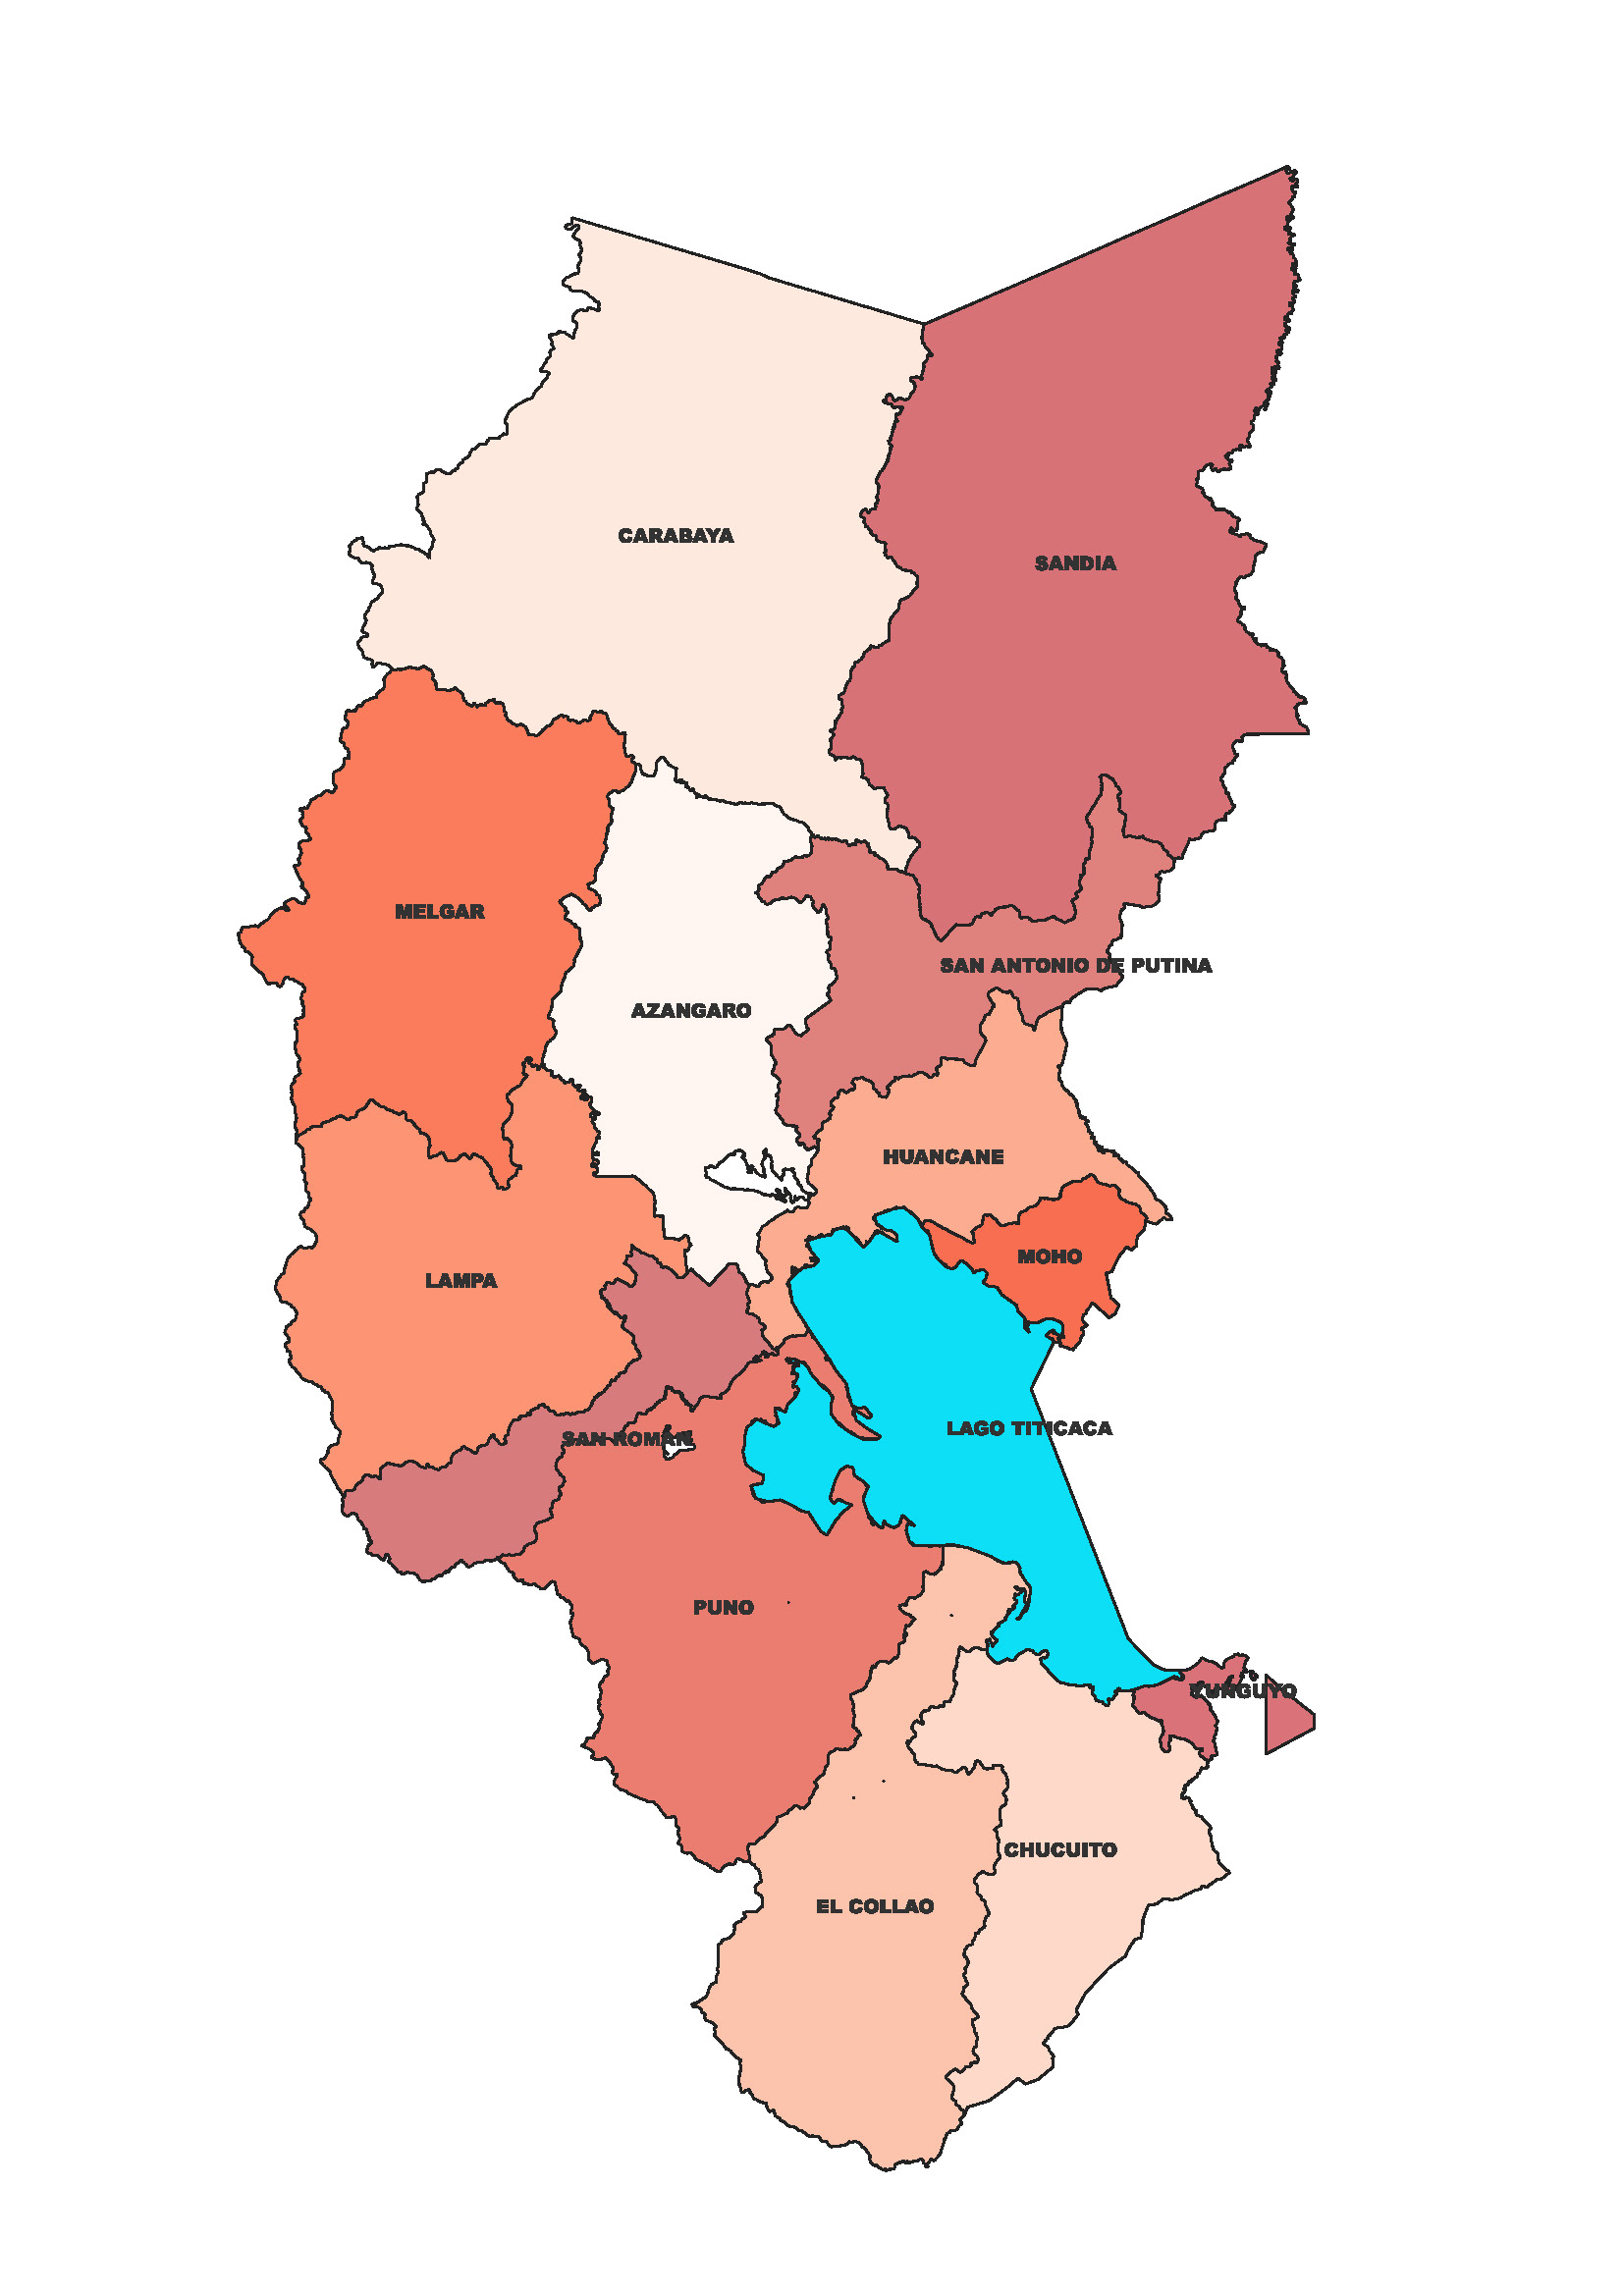

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/DADOS_GeograficosCovid/IMAGENES_PUNO/MAPA_puno.jpg", width=600, height=800)

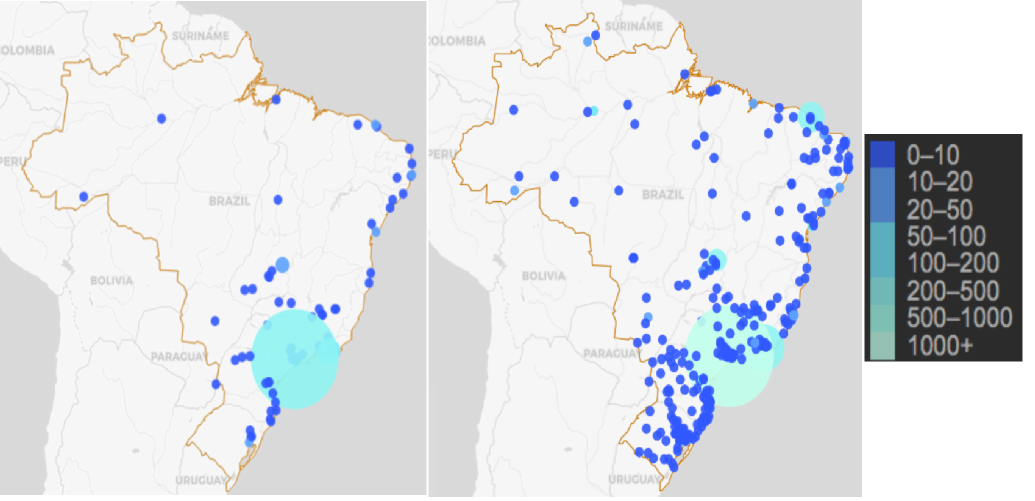

In [ ]:
Image("/content/drive/MyDrive/DADOS_GeograficosCovid/IMAGENES_PUNO/DistribucionPost.png", width=800, height=500)

SELECCION DE PROVINCIAS EM PUNO

In [ ]:
provincias_puno=provincias[provincias['FIRST_NOMB']=="PUNO"]
provincias_puno


,COUNT,FIRST_IDPR,NOMBPROV,FIRST_NOMB,LAST_DCTO,LAST_LEY,FIRST_FECH,LAST_FECHA,MIN_SHAPE_,ha,geometry
17,15.0,2102,AZANGARO,PUNO,DEC.,S/N,EPOCA INDEP.,02/05/1854,5.125764e+05,512576.43,"POLYGON ((1051439.107 8398102.570, 1051433.332..."
36,10.0,2103,CARABAYA,PUNO,-,-,EPOCA INDEP.,EPOCA INDEP.,1.179106e+06,1179106.04,"POLYGON ((1056279.589 8416921.449, 1056328.714..."
52,7.0,2104,CHUCUITO,PUNO,-,-,EPOCA INDEP.,EPOCA INDEP.,3.978922e+05,397892.17,"POLYGON ((1134782.849 8145628.229, 1134558.669..."
68,5.0,2105,EL COLLAO,PUNO,-,-,29/09/1988,EPOCA INDEP.,5.689883e+05,568988.34,"POLYGON ((1079442.657 8123236.999, 1079419.479..."
82,8.0,2106,HUANCANE,PUNO,-,-,EPOCA INDEP.,EPOCA INDEP.,2.847178e+05,284717.80,"POLYGON ((1067889.897 8307803.963, 1067812.111..."
108,10.0,2107,LAMPA,PUNO,-,-,EPOCA INDEP.,EPOCA INDEP.,5.744654e+05,574465.43,"POLYGON ((1013000.553 8308174.551, 1013158.469..."
122,9.0,2108,MELGAR,PUNO,-,-,EPOCA INDEP.,EPOCA INDEP.,6.571948e+05,657194.75,"POLYGON ((1004485.786 8427856.293, 1004488.490..."
123,4.0,2109,MOHO,PUNO,LEY,25360,12/12/1991,12/12/1991,1.035442e+05,103544.16,"POLYGON ((1116864.820 8292091.770, 1116884.769..."
149,15.0,2101,PUNO,PUNO,-,-,EPOCA INDEP.,EPOCA INDEP.,6.537603e+05,653760.32,"MULTIPOLYGON (((1070077.473 8251436.585, 10701..."
156,5.0,2110,SAN ANTONIO DE PUTINA,PUNO,DEC.,S/N,17/03/1962,02/05/1854,3.157714e+05,315771.41,"POLYGON ((1072741.884 8388338.491, 1072820.031..."


In [ ]:
provincias_puno['NOMBPROV'].value_counts()

AZANGARO                 1
CARABAYA                 1
CHUCUITO                 1
EL COLLAO                1
HUANCANE                 1
LAMPA                    1
MELGAR                   1
MOHO                     1
PUNO                     1
SAN ANTONIO DE PUTINA    1
SAN ROMAN                1
SANDIA                   1
YUNGUYO                  1
Name: NOMBPROV, dtype: int64

In [ ]:
cities_list=['AZANGARO', 'CARABAYA' ,'CHUCUITO','EL COLLAO','HUANCANE','LAMPA','MELGAR','MOHO','PUNO','SAN ANTONIO DE PUTINA','SAN ROMAN','SANDIA','YUNGUYO']

In [ ]:
cities_plot=[]
for cities in cities_list:
    cities_und = provincias_puno[provincias_puno['NOMBPROV']==cities].plot(color='orange',edgecolor='white',figsize=(15,8))
    cities_plot += [cities_und]

NameError: ignored